## Imports

In [3]:
import pandas as pd
import seaborn as sns
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import calendar

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


## Functions

In [121]:
def plot_bar(tdf,col,title,xlabel,ylabel='Frequency',rotation=90,height=20,width=3):
    '''
    Method to plot vertical bars.
    
    Inputs:
    - tdf (Dataframe): dataframe with the values.
    - col (String): column name to plot
    - title (String): plot title
    - xlabel (String): label of x axis
    - ylabel (String): label of y axis
    - rotation (int): value to rotate x labels
    - height (int): height of subplot
    - width (int): width of subplot
    Return:
    - plot with vertical bars
    '''
    fig, ax = plt.subplots(figsize=(height,width))
    ax.bar(x=tdf[col].apply(str),height=tdf[0])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

In [181]:
def plot_bar_no_xtick(df,col,title,xlabel,ylabel,xtick='',ascending=False):
    '''
    Plot specific processed dataframe.
    
    Input:
    tdf (Dataframe): specific dataframe
    title (String): title of plot
    xlabel (String): label of x axis
    ylabel (String): label of y axis
    xtick (String): xtick labels
    ascending (Boolean): order of columns
    
    Output:
    Plot vertical bars
    '''
    tdf = df.groupby(col).size().sort_values(ascending=ascending)
    fig, ax = plt.subplots()
    ax.bar(x=tdf.index,height=tdf.values)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xtick)
    plt.show()

In [166]:
def plot_tdf(tdf,title,xlabel,ylabel='Frequency',rotation=90,height=5,width=3):
    '''
    Plot specific processed dataframe.
    
    Input:
    tdf (Dataframe): specific dataframe
    title (String): title of plot
    xlabel (String): label of x axis
    ylabel (String): label of y axis
    rotation (int): value of label x axis rotation
    
    Output:
    Plot vertical bars
    '''
    fig, ax = plt.subplots(figsize=(height,width))
    ax.bar(x=list(map(str, tdf.index)),height=tdf.values)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

In [157]:
def plot_bar_2cols(df,col1,col2,title,xlabel,ylabel='Frequency',count=20,rotation=90,ascending=False):
    '''
    Plot specific processed dataframe.
    
    Input:
    df (Dataframe): specific dataframe
    col1 (String): column name
    col2 (String): column name
    title (string): title of plot
    xlabel (String): label of x axis
    ylabel (String): label of y axis
    count (int): number of columns
    rotation (int): value of label x axis rotation
    ascending (Boolean): order of columns
    
    Output:
    Plot vertical bars
    '''
    tdf = df.groupby([col1,col2]).size().sort_values(ascending=ascending)
    tdf =tdf.reset_index().head(count)
    fig, ax = plt.subplots(figsize=(5,3))
    ax.bar(x=tdf[col2],height=tdf[0])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

In [120]:
def plot_hbar(df,col,title,ylabel,xlabel='Frequency',ascending=True):
    '''
    Method to plot horizontal bars.
    
    Inputs:
    - df (Dataframe): dataframe with the values.
    - col (String): column name to plot
    - title (String): plot title
    - xlabel (String): label of x axis
    - ylabel (String): label of y axis
    - ascending (boolean): order of colunms
    Return:
    - plot with horinzontal bars
    '''
    tdf = df.groupby(col).size().sort_values(ascending=ascending)
    fig, ax = plt.subplots()
    ax.barh(y=tdf.index,width=tdf.values)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [122]:
def plot_bar_proportion(df,col,title,xlabel,ylabel,ascending=False):
    '''
    Method to plot proportional vertical bars.
    
    Inputs:
    - df (Dataframe): dataframe with the values.
    - col (String): column name to plot
    - title (String): plot title
    - xlabel (String): label of x axis
    - ylabel (String): label of y axis
    - ascending (boolean): order of colunms
    Return:
    - plot with proportional horizontal bars
    '''
    tdf = df.groupby(col).size().sort_values(ascending=False)
    tdf = tdf/tdf.sum()
    fig, ax = plt.subplots()
    ax.bar(x=list(map(str, tdf.index)),height=tdf.values)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

### Data Description

In [147]:
df = pd.read_json('mini_sparkify_event_data.json',lines=True)

In [5]:
df.shape

(286500, 18)

In [6]:
df.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length
0,1538352117000,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Martha Tilston,Rockpools,277.89016
1,1538352180000,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Five Iron Frenzy,Canada,236.09424
2,1538352394000,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Adam Lambert,Time For Miracles,282.82730
3,1538352416000,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Enigma,Knocking On Forbidden Doors,262.71302
4,1538352676000,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Daft Punk,Harder Better Faster Stronger,223.60771


In [7]:
df.describe()

,ts,sessionId,status,itemInSession,registration,length
count,2.865000e+05,286500.000000,286500.000000,286500.000000,2.781540e+05,228108.000000
mean,1.540957e+12,1041.526555,210.054597,114.414213,1.535359e+12,249.117182
std,1.507544e+09,726.776263,31.505078,129.767262,3.291322e+09,99.235179
min,1.538352e+12,1.000000,200.000000,0.000000,1.521381e+12,0.783220
25%,1.539697e+12,336.000000,200.000000,27.000000,1.533522e+12,199.888530
50%,1.540932e+12,1013.000000,200.000000,70.000000,1.536664e+12,234.500770
75%,1.542266e+12,1675.000000,200.000000,156.250000,1.537672e+12,277.158730
max,1.543799e+12,2474.000000,404.000000,1321.000000,1.543247e+12,3024.665670


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286500 entries, 0 to 286499
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ts             286500 non-null  int64  
 1   userId         286500 non-null  object 
 2   sessionId      286500 non-null  int64  
 3   page           286500 non-null  object 
 4   auth           286500 non-null  object 
 5   method         286500 non-null  object 
 6   status         286500 non-null  int64  
 7   level          286500 non-null  object 
 8   itemInSession  286500 non-null  int64  
 9   location       278154 non-null  object 
 10  userAgent      278154 non-null  object 
 11  lastName       278154 non-null  object 
 12  firstName      278154 non-null  object 
 13  registration   278154 non-null  float64
 14  gender         278154 non-null  object 
 15  artist         228108 non-null  object 
 16  song           228108 non-null  object 
 17  length         228108 non-nul

*  ts (int): event log timestamp
*  userId (string): user id
*  sessionId (int): session id
*  page (string): page name
*  auth (string): user authentication status
*  method (string): HTTP method
*  status: HTTP status
*  level: account plan
*  itemInSession: 
*  location: user location
*  userAgent: user navigator and SO
*  lastName: user last name
*  firstName: user first name
*  registration: registration date
*  gender: user gender
*  artist: artist name
*  song: song name
*  length: song length

### Missings values

 - How many null values by column?

In [9]:
df.isna().sum()

ts                   0
userId               0
sessionId            0
page                 0
auth                 0
method               0
status               0
level                0
itemInSession        0
location          8346
userAgent         8346
lastName          8346
firstName         8346
registration      8346
gender            8346
artist           58392
song             58392
length           58392
dtype: int64

### Duplicated rows
- How many duplicated rows?

In [10]:
sum(df.duplicated())

0

### Converting column registration to datetime
- There are null values. It's necessary to avoid these rows.

In [151]:
df['registration'] = df['registration'].map(lambda x: datetime.datetime.fromtimestamp(x / 1000.0) if not math.isnan(x) else 0)

In [152]:
df['registration'].head()

0    2018-09-28 19:22:42
1    2018-09-30 15:20:30
2    2018-09-28 19:22:42
3    2018-09-30 15:20:30
4    2018-09-28 19:22:42
Name: registration, dtype: object

### Converting column ts to datetime

In [13]:
df['ts_dt'] = df['ts'].map(lambda x: datetime.datetime.fromtimestamp(x / 1000.0))

In [14]:
df['ts_dt'].head()

0   2018-09-30 21:01:57
1   2018-09-30 21:03:00
2   2018-09-30 21:06:34
3   2018-09-30 21:06:56
4   2018-09-30 21:11:16
Name: ts_dt, dtype: datetime64[ns]

## Data understanding

### ts

- Early date

In [15]:
df['ts_dt'].min()

Timestamp('2018-09-30 21:01:57')

- Late date

In [16]:
df['ts_dt'].max()

Timestamp('2018-12-02 22:11:16')

- Interval (days): there are data of 63 days beginning in 2018-09-30

In [17]:
df['ts_dt'].max() - df['ts_dt'].min()

Timedelta('63 days 01:09:19')

### userId

- How many users?

In [18]:
df['userId'].nunique()

226

- How many interactions by user? 
> The top user had more than 9500 interactions, the minimum of interactions was 6. The mean was about 1200.

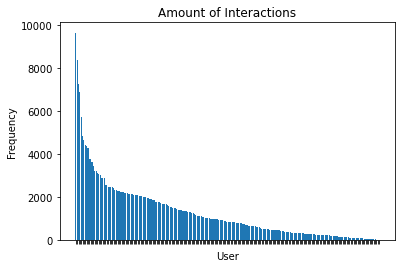

In [182]:
plot_bar_no_xtick(df,'userId','Amount of Interactions','User','Frequency')

In [20]:
tdf.values.mean(),tdf.values.max(),tdf.values.min()

(1267.6991150442477, 9632, 6)

### page

- There are what kind of pages?
> There are 22 kinds of pages.

In [21]:
df['page'].nunique()

22

- How many interactions  with each one?
> Next song page is the most clicked.

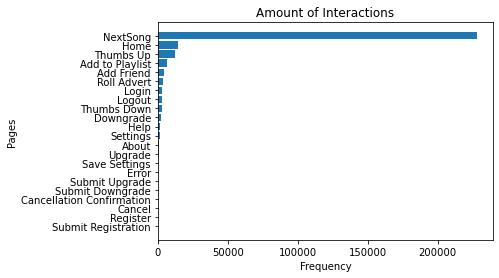

In [116]:
plot_hbar(df,'page','Amount of Interactions','Pages')

### auth

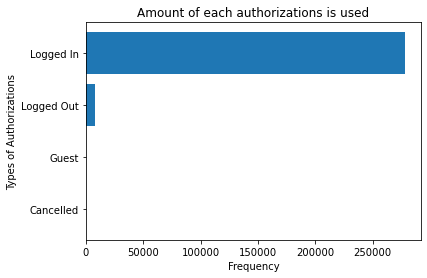

In [117]:
plot_hbar(df,'auth','Amount of each authorizations is used','Types of Authorizations')

### method

- There are how many methods?
> There are 2 types: PUT and GET. The major is to send commands (PUT) through the plataform like `Next song`.

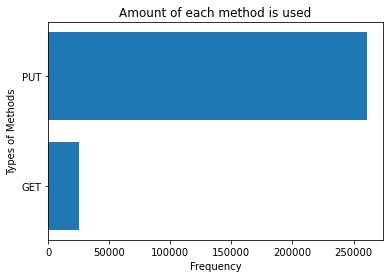

In [118]:
plot_hbar(df,'method','Amount of each method is used','Types of Methods')

### status

- What are the status can user receive?
> The status `200` means success and `307` is temporary redirection. 90% of time the user access the page with no problem, 9% of time the user is redirected. So, 99% of time the service is avaliable.

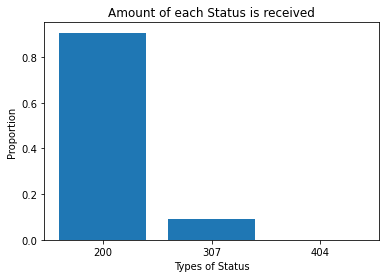

In [124]:
plot_bar_proportion(df,'status','Amount of each Status is received','Types of Status','Proportion')

### level

- What are the levels?
> `80%` of requests are `Paid` while just `20%` are `Free`.

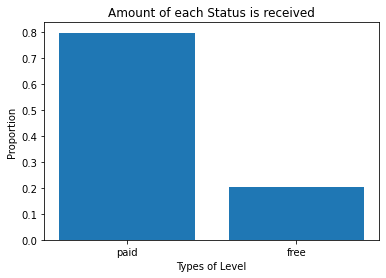

In [126]:
plot_bar_proportion(df,'level','Amount of each Status is received','Types of Level','Proportion')

### location

- How many differents locations?

In [27]:
df['location'].nunique()

114

- What are the locations (city, state)?

In [176]:
tdf = df['location'].str.split(',',n = 1, expand = True)
df['city'] = tdf[0]
df['state'] = tdf[1]
df[['city','state']].head()

,city,state
0,Bakersfield,CA
1,Boston-Cambridge-Newton,MA-NH
2,Bakersfield,CA
3,Boston-Cambridge-Newton,MA-NH
4,Bakersfield,CA


- Where are the users from?

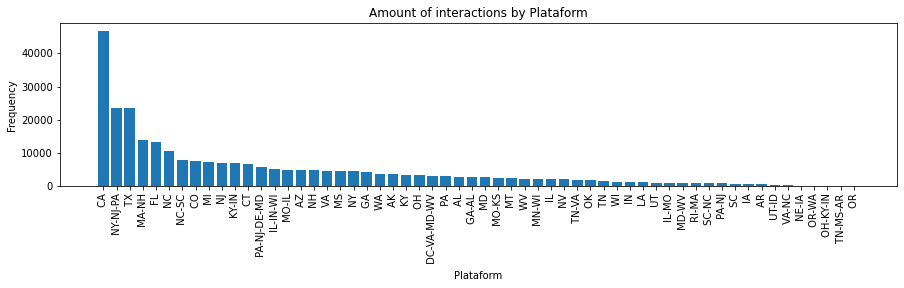

In [178]:
tdf = df.groupby('state').size().sort_values(ascending=False)
plot_tdf(tdf,'Amount of interactions by state','States',height=15,width=3)

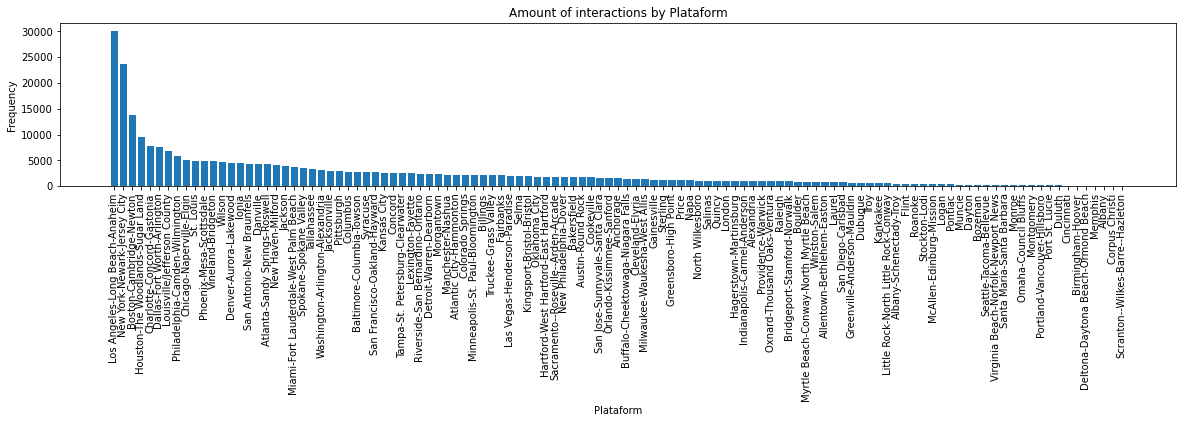

In [177]:
tdf = df.groupby('city').size().sort_values(ascending=False)
plot_tdf(tdf,'Amount of interactions by city','City',height=20,width=3)

### userAgent

- What are the userAgents?

In [ ]:
tdf,xlabel,ylabel='Frequency',rotation=90,height=5,width=3

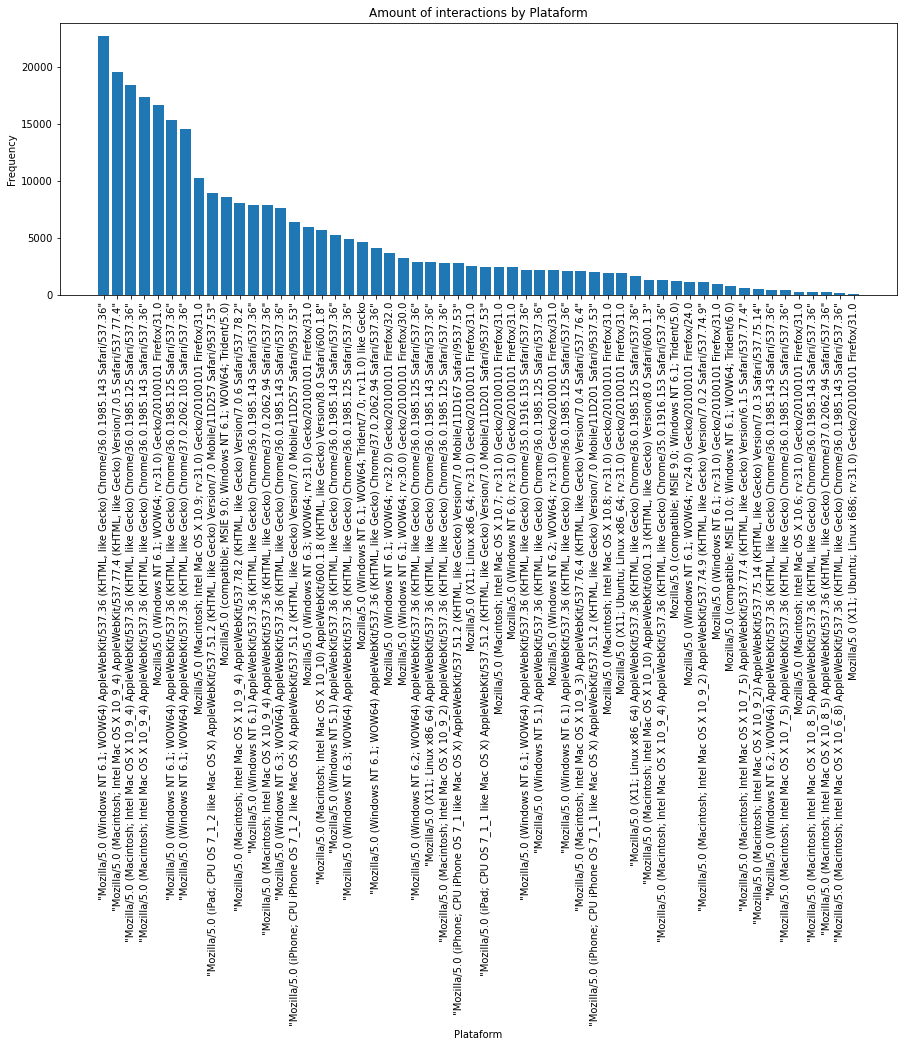

In [171]:
tdf = df.groupby('userAgent').size().sort_values(ascending=False)
plot_tdf(tdf,'Amount of interactions by Plataform','Plataform',height=15,width=5)

- Identify specific Plataforms
> Where is the Android Plataform? We can see the Windows and Macintosh have more participation in interactions. They are not mobile plataform, so the Android should not appears.

In [32]:
#lambda x:x.split('(')[1].split(';')[0].split(')')[0]
def process_userAgent(userAgent):
    part1 = userAgent.split('(')[1]
    
    if('X11' not in part1):
        part2 = part1.split(';')[0].split()[0]
    else:
        part2 = part1.split(';')[1].split(')')[0].split()[0]
        
    return part2

In [172]:
tdf = df[df['userAgent'].notnull()]['userAgent'].apply(process_userAgent).value_counts()

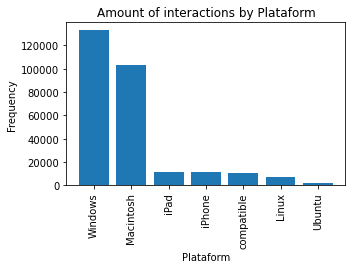

In [173]:
plot_tdf(tdf,'Amount of interactions by Plataform','Plataform')

### lastName

- What are the 20 most comum names?


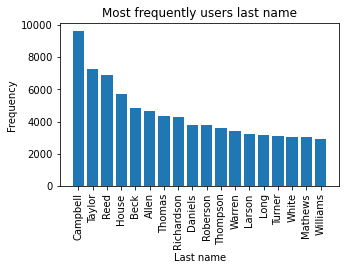

In [158]:
plot_bar_2cols(df,'userId','lastName','Most frequently users last name','Last name')

### firstName

- What are the 20 most comum names?

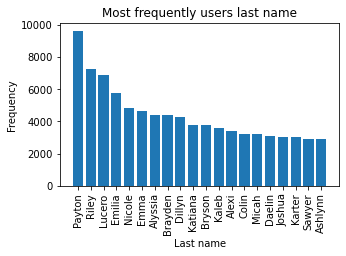

In [160]:
plot_bar_2cols(df,'userId','firstName','Most frequently users last name','Last name')

### registration

- which date has more registrations?

In [150]:
df['registration']

0         1.538173e+12
1         1.538332e+12
2         1.538173e+12
3         1.538332e+12
4         1.538173e+12
              ...     
286495             NaN
286496             NaN
286497    1.538337e+12
286498    1.538337e+12
286499    1.538337e+12
Name: registration, Length: 286500, dtype: float64

- Registration year
> All registrations occured in 2018.

In [38]:
df['registration_year'] = df['registration'].map(lambda x: x.year if x != 0 else 0)
df['registration_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: registration_year, dtype: int64

In [39]:
tdf = df.groupby(['userId','registration_year']).size().sort_values(ascending=False)
tdf =tdf.reset_index().head(20)

- Registration month

In [153]:
df['registration_month'] = df['registration'].map(lambda x: x.month if x != 0 else 0)
df['registration_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: registration_month, dtype: int64

In [41]:
tdf = df.groupby(['userId','registration_month']).size().sort_values(ascending=False)
tdf = tdf.reset_index()
tdf = tdf.groupby('registration_month').size()
tdf

registration_month
0       1
3       1
5       2
6      10
7      28
8      50
9     129
10      1
11      4
dtype: int64

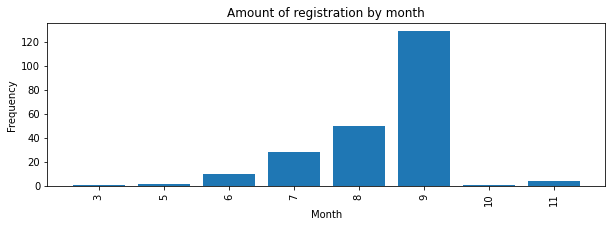

In [144]:
tdf = df.groupby(['userId','registration_month']).size().sort_values(ascending=False)
tdf = tdf.reset_index()
tdf = tdf.groupby('registration_month').size()
fig, ax = plt.subplots(figsize=(10,3))
tdf = tdf[tdf.index != 0]
ax.bar(x=list(map(str, tdf.index)),height=tdf.values)
ax.set_title("Amount of registration by month")
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

- Registration day
> The days zero are the rows with no date.

In [43]:
df['registration_day'] = df['registration'].map(lambda x: x.day if x != 0 else 0)
df['registration_day'].head()

0    28
1    30
2    28
3    30
4    28
Name: registration_day, dtype: int64

- Creating a new colum to concatenate the month and day
> The registrations occured more between 11/09 and 30/09.

In [133]:
df['registration_weekday'] = df['registration'].map(lambda x: calendar.day_name[x.weekday()] if x != 0 else 0)
tdf = df.groupby(['userId','registration_month','registration_day','registration_weekday']).size().sort_values(ascending=False)
tdf = tdf.reset_index()
tdf = tdf.groupby(['registration_month','registration_day','registration_weekday']).size()
tdf = tdf.reset_index()
tdf['date'] = tdf['registration_day'].apply(str)+'/'+tdf['registration_month'].apply(str)

In [134]:
tdf = tdf[tdf.index != 0]
tdf.head()

,registration_month,registration_day,registration_weekday,0,date
1,3,18,Sunday,1,18/3
2,5,19,Saturday,1,19/5
3,5,20,Sunday,1,20/5
4,6,7,Thursday,1,7/6
5,6,9,Saturday,1,9/6


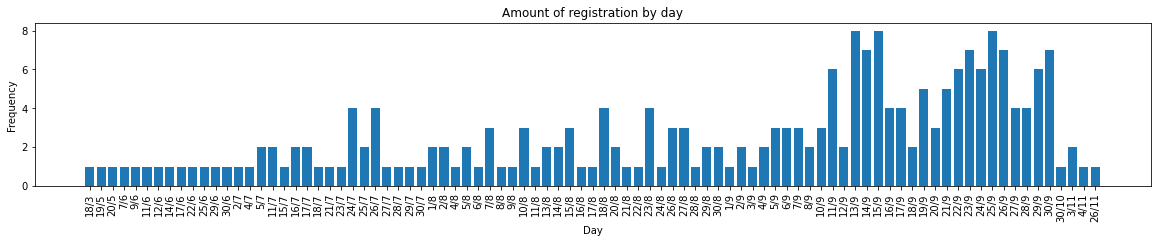

In [136]:
plot_bar(tdf,'date','Amount of registration by day','Day')

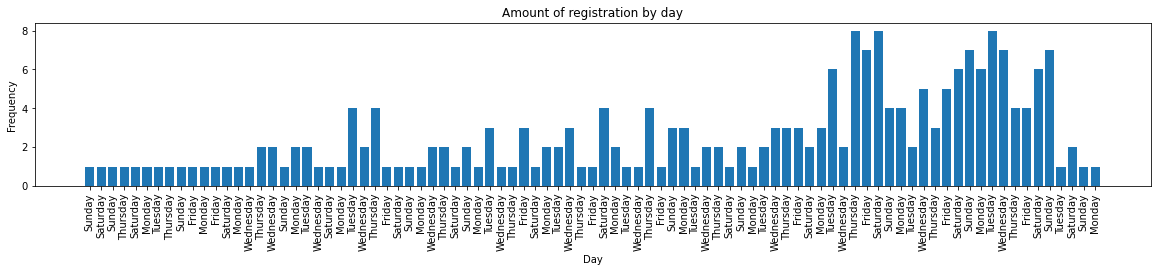

In [47]:
fig, ax = plt.subplots(figsize=(20,3))
ax.bar(x=tdf['date'],height=tdf[0])
ax.set_title("Amount of registration by day")
ax.set_xlabel('Day')
ax.set_ylabel('Frequency')
plt.xticks(range(len(tdf['date'])), tdf['registration_weekday'],rotation=90)
plt.show()

- Counting registrations by weekday
> The number of registrations by weekday are similar.

In [129]:
tdf = df.groupby(['userId','registration_weekday']).size()
tdf.reset_index()
tdf = tdf.groupby('registration_weekday').size()
tdf = tdf.reset_index()
tdf = tdf[tdf.index != 0]

In [130]:
# Converting column registration_weekday to categorical to enable to sort
tdf['registration_weekday'] = pd.Categorical(tdf['registration_weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [131]:
# Ordering the column
tdf = tdf.sort_values(by=['registration_weekday'])

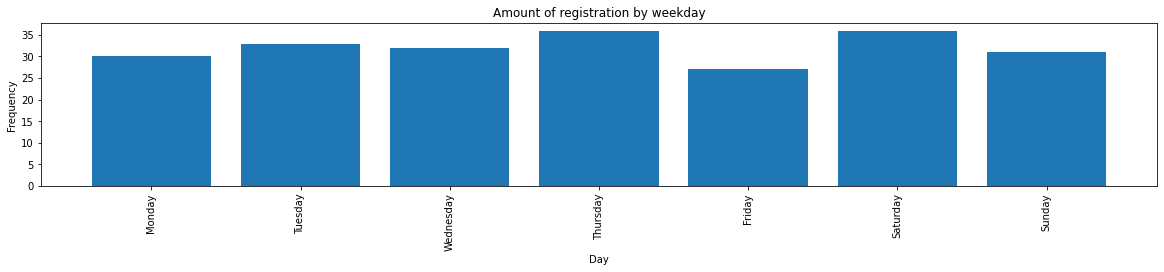

In [132]:
plot_bar(tdf,'registration_weekday','Amount of registration by weekday','Day')

- Registration hour

In [52]:
df['registration_hour'] = df['registration'].map(lambda x: x.hour if x != 0 else 0)
df['registration_hour'].head()

0    19
1    15
2    19
3    15
4    19
Name: registration_hour, dtype: int64

In [111]:
tdf = df.groupby(['userId','registration_hour']).size()
tdf.reset_index()
tdf = tdf.groupby('registration_hour').size()
tdf = tdf.reset_index()
tdf = tdf[tdf.index != 0]

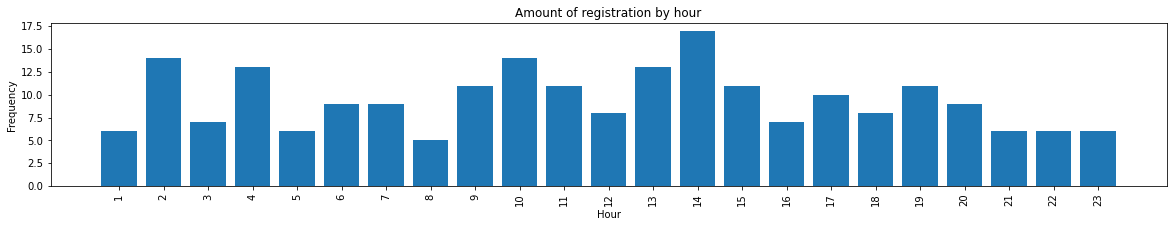

In [113]:
plot_bar(tdf,'registration_hour',"Amount of registration by hour",'Hour')

- gender
> There are more women than men.

In [128]:
tdf = df.groupby(['userId','gender']).size()
tdf.reset_index()
tdf = tdf.groupby('gender').size()
tdf = tdf.reset_index()
tdf

,gender,0
0,F,104
1,M,121


### Creating Churn Dataframe

In [56]:
# Copying the original dataframe
df_churn = df.copy()

In [57]:
# Identifying the churned users rows
churn_users = df_churn[df_churn['page']=="Cancellation Confirmation"]["userId"].drop_duplicates()
df_churn['churn'] = df_churn['userId'].isin(churn_users.values)
df_churn.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,...,length,ts_dt,city,state,registration_year,registration_month,registration_day,registration_weekday,registration_hour,churn
0,1538352117000,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",...,277.89016,2018-09-30 21:01:57,Bakersfield,CA,2018,9,28,Friday,19,False
1,1538352180000,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH",...,236.09424,2018-09-30 21:03:00,Boston-Cambridge-Newton,MA-NH,2018,9,30,Sunday,15,False
2,1538352394000,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",...,282.82730,2018-09-30 21:06:34,Bakersfield,CA,2018,9,28,Friday,19,False
3,1538352416000,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH",...,262.71302,2018-09-30 21:06:56,Boston-Cambridge-Newton,MA-NH,2018,9,30,Sunday,15,False
4,1538352676000,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",...,223.60771,2018-09-30 21:11:16,Bakersfield,CA,2018,9,28,Friday,19,False


- How many churned users by gender?

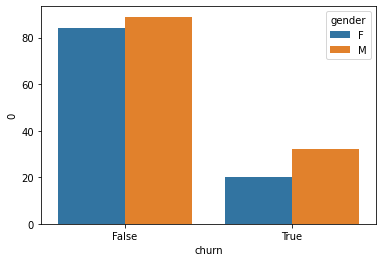

In [58]:
tdf = df_churn.groupby(['userId','churn', 'gender']).size().reset_index()
tdf = tdf.groupby(['churn','gender']).size().reset_index()
sns.barplot(x='churn', y=0, hue='gender', data=tdf)

- How many users by page?

In [59]:
churn_count = sum(df_churn['churn'])
no_churn_count = sum(~df_churn['churn'])

In [60]:
df_temp1 = df_churn[(df_churn['churn']==True) & (df_churn['page']!='NextSong')].groupby('page').size()
df_temp1 = df_temp1.reset_index()
df_temp1.rename({0:'count'},axis=1,inplace=True)
df_temp1['cFreq'] = df_temp1["count"]/(churn_count/100)
df_temp1.head()

,page,count,cFreq
0,About,56,0.124822
1,Add Friend,636,1.417618
2,Add to Playlist,1038,2.313659
3,Cancel,52,0.115906
4,Cancellation Confirmation,52,0.115906


In [61]:
df_temp2 = df_churn[(df_churn['churn']==False) & (df_churn['page']!='NextSong')].groupby('page').size()
df_temp2 = df_temp2.reset_index()
df_temp2.rename({0:'count'},axis=1,inplace=True)
df_temp2['ncFreq'] = df_temp2["count"]/(churn_count/100)
df_temp2.head()

,page,count,ncFreq
0,About,868,1.934736
1,Add Friend,3641,8.115638
2,Add to Playlist,5488,12.232525
3,Downgrade,1718,3.829351
4,Error,226,0.503745


In [62]:
tdf = df_temp1.set_index('page').drop('count',axis=1).join(df_temp2.set_index('page')).fillna(0)
tdf = tdf.drop('count',axis=1)
tdf.head()

,cFreq,ncFreq
page,,
About,0.124822,1.934736
Add Friend,1.417618,8.115638
Add to Playlist,2.313659,12.232525
Cancel,0.115906,0.000000
Cancellation Confirmation,0.115906,0.000000


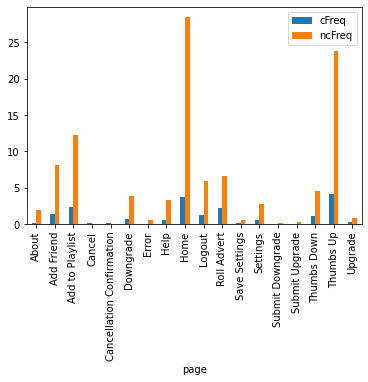

In [63]:
tdf = tdf.reset_index()
tdf.plot.bar('page')

- How many Cancellation Confirmation page by level?

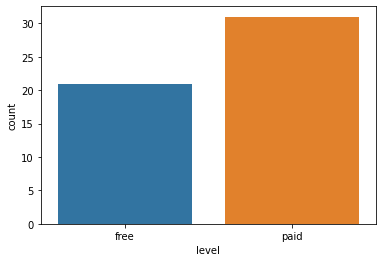

In [64]:
tdf = df_churn[df_churn['page']=='Cancellation Confirmation'].groupby('level').size()
tdf = tdf.reset_index()
tdf.rename({0:'count'},axis=1,inplace=True)
sns.barplot(x="level", y="count", data=tdf)

- How many churned users by ts time?

In [65]:
df_churn['ts_hour'] = df_churn['ts_dt'].apply(lambda x : x.hour)

In [66]:
df_churn['ts_weekday'] = df_churn['ts_dt'].apply(lambda x : x.strftime("%w"))

In [67]:
df_churn['ts_day'] = df_churn['ts_dt'].apply(lambda x : x.day)

In [68]:
df_churn.columns

Index(['ts', 'userId', 'sessionId', 'page', 'auth', 'method', 'status',
       'level', 'itemInSession', 'location', 'userAgent', 'lastName',
       'firstName', 'registration', 'gender', 'artist', 'song', 'length',
       'ts_dt', 'city', 'state', 'registration_year', 'registration_month',
       'registration_day', 'registration_weekday', 'registration_hour',
       'churn', 'ts_hour', 'ts_weekday', 'ts_day'],
      dtype='object')

## Feature Engineering

- Feature 1: number of days since registration

In [69]:
df_churn.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,...,state,registration_year,registration_month,registration_day,registration_weekday,registration_hour,churn,ts_hour,ts_weekday,ts_day
0,1538352117000,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",...,CA,2018,9,28,Friday,19,False,21,0,30
1,1538352180000,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH",...,MA-NH,2018,9,30,Sunday,15,False,21,0,30
2,1538352394000,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",...,CA,2018,9,28,Friday,19,False,21,0,30
3,1538352416000,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH",...,MA-NH,2018,9,30,Sunday,15,False,21,0,30
4,1538352676000,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",...,CA,2018,9,28,Friday,19,False,21,0,30


In [70]:
df_churn = df_churn[df_churn['userId'].apply(lambda x: True if len(str(x)) > 0 else False)]

In [71]:
user_max_ts = df_churn.groupby('userId')['ts_dt'].max().reset_index().sort_values('userId')
user_max_ts.head()

,userId,ts_dt
0,10,2018-11-19 09:49:48
1,100,2018-11-30 11:15:49
2,100001,2018-10-02 13:36:45
3,100002,2018-12-02 22:11:16
4,100003,2018-10-11 13:19:41


In [72]:
user_reg_ts = df_churn[["userId", "registration"]].drop_duplicates().sort_values("userId")
user_reg_ts.head()

,userId,registration
20920,10,2018-09-28 15:31:35
4582,100,2018-09-26 14:17:35
213708,100001,2018-08-18 18:24:26
216243,100002,2018-06-25 10:51:29
216619,100003,2018-09-18 19:22:24


In [73]:
user_max_ts = user_max_ts.set_index('userId')
user_reg_ts = user_reg_ts.set_index('userId')

In [74]:
user_reg_days = user_reg_ts.join(user_max_ts)
user_reg_days.head()

,registration,ts_dt
userId,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48
100,2018-09-26 14:17:35,2018-11-30 11:15:49
100001,2018-08-18 18:24:26,2018-10-02 13:36:45
100002,2018-06-25 10:51:29,2018-12-02 22:11:16
100003,2018-09-18 19:22:24,2018-10-11 13:19:41


In [75]:
user_reg_days['registration'] = pd.to_datetime(user_reg_days['registration'])
#user_reg_days['ts_dt'] = pd.to_datetime(user_reg_days['ts_dt'])

In [76]:
user_reg_days['regDay']  =  user_reg_days['ts_dt']-user_reg_days['registration']
user_reg_days.head()

,registration,ts_dt,regDay
userId,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17


- Feature 2: avg & min & max time per session

In [77]:
def max_min(x):
    return x.max() - x.min()

In [78]:
user_session_time = df_churn.copy()
user_session_time = user_session_time.groupby(['userId', 'sessionId']).\
    agg({'ts':[min,max,max_min]})

In [79]:
user_session_time = user_session_time.reset_index()
tdf = pd.DataFrame(user_session_time.to_records())
tdf.columns = ['index','userId','sessionId','min','max','max_min']
tdf.head()

,index,userId,sessionId,min,max,max_min
0,0,10,9,1538965220000,1538979372000,14152000
1,1,10,595,1539833923000,1539926798000,92875000
2,2,10,1047,1540850546000,1540856031000,5485000
3,3,10,1414,1541255262000,1541270598000,15336000
4,4,10,1592,1542310466000,1542327989000,17523000


In [80]:
user_session_time_stat = tdf.groupby('userId').agg({'max_min':[np.mean,min,max]}).reset_index()
user_session_time_stat.head()

userId       max_min                   
                   mean      min       max
0      10  2.758483e+07  5485000  92875000
1     100  1.899114e+07        0  61175000
2  100001  8.889500e+06  3780000  12917000
3  100002  1.207100e+07        0  43828000
4  100003  5.947000e+06   193000  11701000

- Feature 3: number of songs per session

In [81]:
user_session_songs = df_churn[df_churn['page']=='NextSong'].groupby(['userId', 'sessionId']).size().reset_index()
user_session_songs.rename({0:'count'},axis=1,inplace=True)
user_session_songs.head()

,userId,sessionId,count
0,10,9,57
1,10,595,381
2,10,1047,21
3,10,1414,63
4,10,1592,67


In [82]:
user_session_songs_avg = user_session_songs.groupby("userId").agg({'count':[np.mean]})
user_session_songs_avg.head()

,count
,mean
userId,
10,112.166667
100,78.882353
100001,33.250000
100002,48.750000
100003,25.500000


In [83]:
user_session_songs_avg = pd.DataFrame(user_session_songs_avg.to_records())
user_session_songs_avg.columns = ['userId','mean']
user_session_songs_avg.head()

,userId,mean
0,10,112.166667
1,100,78.882353
2,100001,33.250000
3,100002,48.750000
4,100003,25.500000


- Feature 4: gender

In [84]:
user_gender = df_churn[['userId', 'gender']].drop_duplicates()
user_gender['gender'] = user_gender['gender'].replace(["M", "F"], ["0", "1"])
user_gender.head()

,userId,gender
0,30,0
1,9,0
17,74,1
22,54,1
74,4,0


- Feature 5: number of sessions

In [85]:
user_session_count = df_churn[['userId', 'sessionId']].drop_duplicates().groupby("userId").size()
user_session_count.head()

userId
10         6
100       35
100001     4
100002     4
100003     2
dtype: int64

- Feature 6: how many singers have the user heard

In [86]:
user_artist_count = df_churn[df_churn['page']=='NextSong'][['userId','artist']].drop_duplicates().groupby('userId').size()
user_artist_count = user_artist_count.reset_index()
user_artist_count.rename({0:'aritstCount'},axis=1,inplace=True)
user_artist_count.head()

,userId,aritstCount
0,10,565
1,100,1705
2,100001,125
3,100002,184
4,100003,50


### Put all features together

- Dataframes
<ul>
<li>user_reg_days</li>
<li>user_session_time_stat</li>
<li>user_session_songs_avg</li>
<li>user_gender</li>
<li>user_session_count</li>
    <li>user_artist_count</li>
</ul>

In [87]:
usts = user_session_time_stat.droplevel(0, axis=1)
usts.rename({'':'userId','mean':'ts_mean','min':'ts_min','max':'ts_max'},axis=1,inplace=True)
usts.head()

,userId,ts_mean,ts_min,ts_max
0,10,2.758483e+07,5485000,92875000
1,100,1.899114e+07,0,61175000
2,100001,8.889500e+06,3780000,12917000
3,100002,1.207100e+07,0,43828000
4,100003,5.947000e+06,193000,11701000


In [88]:
tdf = user_reg_days.join(usts.set_index('userId'))
tdf.head()

,registration,ts_dt,regDay,ts_mean,ts_min,ts_max
userId,,,,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13,2.758483e+07,5485000,92875000
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14,1.899114e+07,0,61175000
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19,8.889500e+06,3780000,12917000
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47,1.207100e+07,0,43828000
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17,5.947000e+06,193000,11701000


In [89]:
user_session_songs_avg.rename({'mean':'song_mean'},axis=1,inplace=True)
user_session_songs_avg.head()

,userId,song_mean
0,10,112.166667
1,100,78.882353
2,100001,33.250000
3,100002,48.750000
4,100003,25.500000


- Join with user_session_songs_avg dataframe

In [90]:
tdf = tdf.join(user_session_songs_avg.set_index('userId'))
tdf.head()

,registration,ts_dt,regDay,ts_mean,ts_min,ts_max,song_mean
userId,,,,,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13,2.758483e+07,5485000,92875000,112.166667
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14,1.899114e+07,0,61175000,78.882353
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19,8.889500e+06,3780000,12917000,33.250000
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47,1.207100e+07,0,43828000,48.750000
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17,5.947000e+06,193000,11701000,25.500000


- Join with user_gender dataframe

In [91]:
tdf = tdf.join(user_gender.set_index('userId'))
tdf.head()

,registration,ts_dt,regDay,ts_mean,ts_min,ts_max,song_mean,gender
userId,,,,,,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13,2.758483e+07,5485000,92875000,112.166667,0
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14,1.899114e+07,0,61175000,78.882353,0
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19,8.889500e+06,3780000,12917000,33.250000,1
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47,1.207100e+07,0,43828000,48.750000,1
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17,5.947000e+06,193000,11701000,25.500000,1


- Join with user_session_count dataframe

In [92]:
usc = user_session_count.reset_index()
usc.rename({0:'count_session'},axis=1,inplace=True)
usc.head()

,userId,count_session
0,10,6
1,100,35
2,100001,4
3,100002,4
4,100003,2


In [93]:
tdf = tdf.join(usc.set_index('userId'))
tdf.head()

,registration,ts_dt,regDay,ts_mean,ts_min,ts_max,song_mean,gender,count_session
userId,,,,,,,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13,2.758483e+07,5485000,92875000,112.166667,0,6
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14,1.899114e+07,0,61175000,78.882353,0,35
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19,8.889500e+06,3780000,12917000,33.250000,1,4
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47,1.207100e+07,0,43828000,48.750000,1,4
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17,5.947000e+06,193000,11701000,25.500000,1,2


- Join with user_artist_count dataframe

In [94]:
tdf = tdf.join(user_artist_count.set_index('userId'))
tdf.head()

,registration,ts_dt,regDay,ts_mean,ts_min,ts_max,song_mean,gender,count_session,aritstCount
userId,,,,,,,,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13,2.758483e+07,5485000,92875000,112.166667,0,6,565
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14,1.899114e+07,0,61175000,78.882353,0,35,1705
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19,8.889500e+06,3780000,12917000,33.250000,1,4,125
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47,1.207100e+07,0,43828000,48.750000,1,4,184
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17,5.947000e+06,193000,11701000,25.500000,1,2,50


- Add churn column

In [95]:
dc = df_churn.groupby(['userId','churn']).size().reset_index()[['userId','churn']]

In [96]:
tdf = tdf.join(dc.set_index('userId'))
tdf.head()

,registration,ts_dt,regDay,ts_mean,ts_min,ts_max,song_mean,gender,count_session,aritstCount,churn
userId,,,,,,,,,,,
10,2018-09-28 15:31:35,2018-11-19 09:49:48,51 days 18:18:13,2.758483e+07,5485000,92875000,112.166667,0,6,565,False
100,2018-09-26 14:17:35,2018-11-30 11:15:49,64 days 20:58:14,1.899114e+07,0,61175000,78.882353,0,35,1705,False
100001,2018-08-18 18:24:26,2018-10-02 13:36:45,44 days 19:12:19,8.889500e+06,3780000,12917000,33.250000,1,4,125,True
100002,2018-06-25 10:51:29,2018-12-02 22:11:16,160 days 11:19:47,1.207100e+07,0,43828000,48.750000,1,4,184,False
100003,2018-09-18 19:22:24,2018-10-11 13:19:41,22 days 17:57:17,5.947000e+06,193000,11701000,25.500000,1,2,50,True


## Modeling

In [97]:
tdf_final = tdf[[]]

- Split dataframe into train and test

In [98]:
train, test = train_test_split(tdf, test_size=0.2)

In [99]:
x_train = train[['ts_mean','ts_min','ts_max','song_mean','gender','count_session','aritstCount']]
y_train = train[['churn']]

In [100]:
x_test = test[['ts_mean','ts_min','ts_max','song_mean','gender','count_session','aritstCount']]
y_test = test[['churn']]

- Creating and trainning the model

In [101]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(x_train, y_train)

<ipython-input-101-3ae135f2971f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=15, random_state=0)

- Predicting

In [102]:
y_pred = clf.predict(x_test)

In [103]:
y_pred

array([False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False])

- Evaluation

In [104]:
y_test['churn'].to_list()

[False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False]

In [105]:
list(y_pred)

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [106]:
count = 0
for y1,y2 in zip(y_test['churn'].to_list(),list(y_pred)):
    if(y1 == y2):
        count += 1
print(count/len(y_pred))       

0.6


## Conclusion

> Exceptional performance of model. It hit 71% of accuracy. 